In [36]:
from yaml import load
import requests

In [37]:
f = open('config.yaml', mode = 'r', encoding = 'utf-8')
config = load(f)
token = config['access_token']

In [38]:
url = 'https://api.vk.com/method/users.get'
params = {
    'user_ids':'1,2,3',
    'v': 5.73,
    'fields': 'sex,bdate,city',
    'access_token': token
}
from pprint import pprint
data = requests.get(url, params = params)
pprint(data.json())

{'response': [{'bdate': '10.10.1984',
               'city': {'id': 2, 'title': 'Saint Petersburg'},
               'first_name': 'Pavel',
               'id': 1,
               'last_name': 'Durov',
               'sex': 2},
              {'first_name': 'Alexandra',
               'id': 2,
               'last_name': 'Vladimirova',
               'sex': 1},
              {'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'last_name': '',
               'sex': 0}]}


In [39]:
url = 'https://api.vk.com/method/groups.getMembers'
params = {
    'group_id':'habr',
    'v': 5.73,
#     'offset': 800000, #превышает кол-во участников группы
    'access_token': token
}
r = requests.get(url, params = params)
data = r.json()
user_ids = data['response']['items'][:1000]
len(user_ids)

1000

In [40]:
rows_limit = 100
user_lists = []
position = 0
while position < len(user_ids):
    user_lists.append(user_ids[position:position + rows_limit])
    position += rows_limit
len(user_lists)

10

In [41]:
url = 'https://api.vk.com/method/users.get?'
city_dict = {'none': 1}
for i in range(len(user_lists)):
    for user in user_lists[i]:
        params = {
            'user_id': user,
            'v': 5.52,
            'fields': 'city',
            'access_token': token
        }
        r = requests.get(url, params = params)
        data = r.json()
        if 'city' in data['response'][0]:
            country = data['response'][0]['city']['title']
            if country in city_dict:
                city_dict[country]+=1
            elif country not in city_dict:
                city_dict[country] = 1
        else:
            city_dict['none'] += 1

In [42]:
city_dict

{'none': 224,
 'Saint Petersburg': 522,
 'Moscow': 137,
 'Boston': 1,
 'Perm': 1,
 'Auckland': 1,
 'Mountain View': 1,
 'Lviv': 1,
 'Minsk': 1,
 'Reykjavík': 1,
 'Krasnoyarsk': 2,
 'Volgograd': 1,
 'Ufa': 2,
 'Newark': 1,
 'Phuket': 2,
 'Berlin': 3,
 'Nizhny Novgorod': 4,
 'Paris': 2,
 'Kraków': 1,
 'Novosibirsk': 7,
 'Proletarsk': 1,
 'Orenburg': 2,
 'New York City': 2,
 'Belgorod': 2,
 'Kazan': 4,
 'Saratov': 3,
 'Los Angeles': 1,
 'Limassol': 1,
 'Drug Krestyanina': 1,
 'Stanley': 1,
 'Yagotin': 1,
 'Foster City': 1,
 'Santa Clara': 1,
 'Dolgoprudny': 1,
 'Frankfurt am Main': 1,
 'Radischevo': 1,
 'Krasnodar': 2,
 'Espoo': 1,
 'Donetsk': 1,
 'Novorossiysk': 1,
 'Almaty': 2,
 'Sochi': 1,
 'Toronto': 1,
 'München': 1,
 'Tel Aviv': 2,
 'Penza': 4,
 'Barnaul': 1,
 'Khimki': 1,
 'Klintsy': 1,
 'Burgas': 1,
 'San Francisco': 2,
 'Edinburgh': 1,
 'Yekaterinburg': 4,
 'Korolyov': 1,
 'Feodosia': 1,
 'Hamilton': 1,
 'Sergiev Posad': 1,
 'London': 3,
 'Accra': 1,
 'Petropavlovsk-Kamchatsky': 

In [43]:
import pandas as pd 


In [44]:
df = pd.DataFrame.from_dict(city_dict, orient = 'index').reset_index()

In [45]:
df.rename(columns = {'index':'city', 0: 'users'}, inplace = True)
df = df.sort_values('users', ascending = False)

In [47]:
df['category'] = df.apply(lambda x: x['city'] if x['users'] > 100 else 'Другие', axis = 1)  

In [48]:
df = df.groupby('category').sum().head()

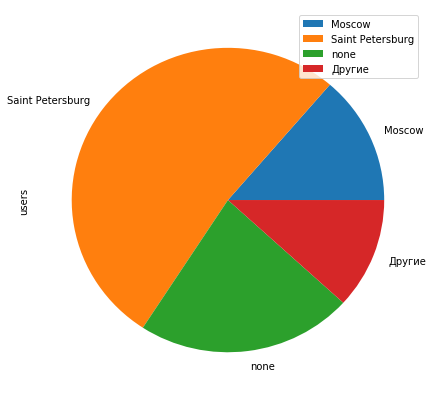

In [49]:
%matplotlib inline
df.head().plot(kind = 'pie', y = 'users', figsize = (7,7))